Autor: Carlos Juarez
Fecha: 17 de octubre de 2024
Comentarios: programa para resolver la ecuaciòn de laplace a travès de diferencias finitas

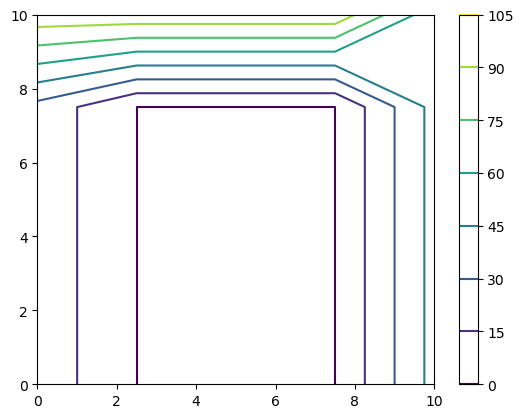

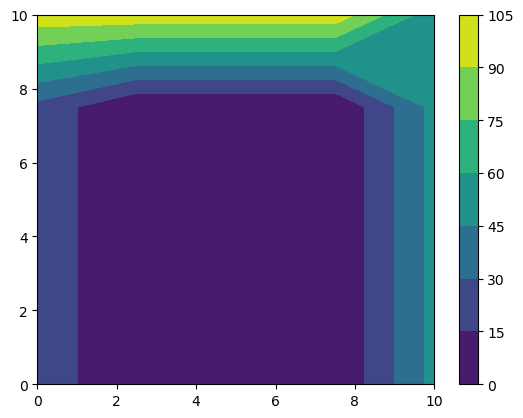

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la placa
Lx = 10
Ly = 10
h = 2.5

x = np.arange(0,Lx+h,h)
y = np.arange(0,Ly+h,h)

X,Y = np.meshgrid(x,y)
# plt.plot(X,Y,'*') # ploteo la grilla

T = np.zeros((len(y),len(x)))

# Condiciones de Frontera
# Condición de Dirichlet--> variable dependiente esta fija
T[0,:] = 0 # condicion de frontera en borde inferior
T[:,0] = 25 # condicion de frontera en borde izquierdo
T[-1,:] = 100 # condiciòn de frontera borde superior
T[:,-1] = 50

# gràfica en 2D/3D
plt.contour(X,Y,T)# lineas de contorno
plt.colorbar()
plt.figure()
plt.contourf(X,Y,T)
plt.colorbar()

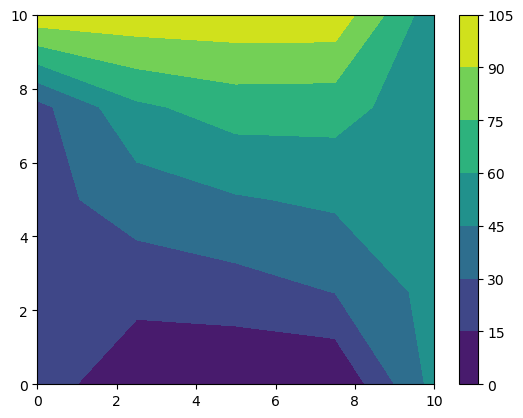

In [59]:
# soluciòn de puntos internos de la placa
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            T[j][i] = (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4

    Error = np.max(abs(T - Tant))
    
plt.contourf(X,Y,T)
plt.colorbar()

In [61]:
print(T,'\n',Tant)

[[ 25.           0.           0.           0.          50.        ]
 [ 25.          21.32939089  23.78474689  30.30755182  50.        ]
 [ 25.          36.73117536  43.65081787  47.49505175  50.        ]
 [ 25.          57.09326605  66.69148031  66.04663301  50.        ]
 [100.         100.         100.         100.          50.        ]] 
 [[ 25.           0.           0.           0.          50.        ]
 [ 25.          21.23021986  23.68556787  30.25796092  50.        ]
 [ 25.          36.63199567  43.55163574  47.44546038  50.        ]
 [ 25.          57.04367482  66.64188885  66.02183731  50.        ]
 [100.         100.         100.         100.          50.        ]]
